In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from scipy.stats import norm

mpl.rc('font', family='serif', serif = "cmr10", size=18)
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams["errorbar.capsize"] = 5
mpl.rcParams['axes.unicode_minus'] = False

From Kohlinger, Hoekstra, Eriksen 2015, the following covariance matrix corresponds to the statistical uncertainty in peak measurements:
$$ C = C^{\text{shape}} + C^{\text{LSS}} (18)$$

The shape noise covariance matrix consists of the diagonal terms:
$$ [C^{\text{shape}}]_{\alpha \beta, k l} = \delta_{\alpha \beta} \delta_{k l} \sigma^2_{\text{shape}}$$

$$\sigma^2_{\text{shape}} = \sigma^2_{\text{int}}/N_k$$
where $\sigma^2_{\text{int}}$ is the intrinsic ellipticity noise per galaxy and $N_k$ is the number of background galaxies per pixel $k$.

There is a similar, more detailed discussion in Hoekstra 2003.



# Main Analysis

From Harvey, Massey 2013:

Total shear distribution:
$$ e^{tot}_i = e^{(I)}_i + c_i + \sigma^N_i (12)$$
where, 
$e^{(I)}_i$ is the intrinsic ellipticity distribution $\sim N(0, 0.3'')$, 
$c_i$ is a constant spurious signal $\sim N(0, 0.01'')$, 
and $\sigma^{N}_i$ is the pixelation noise $\sim N(0, 0.01'')$.

The total width of this distribution is
$$\sigma = \sqrt{0.3^2 + 0.01^2 +0.01^2}  \approx 0.3. $$


Lenstools uses a gaussian Likelihood function $\sim e^{-\chi^2/2}$ to estimate the lensing signal. $\chi^2$ is given by:

$$ \chi^2 = \sum_{i=1}^N \sum_{j=1}^N  \frac{e_{i,j}^{(s)^2}}{\sigma^2_{i,j}}$$

<!-- where $\sigma^2_{i,j} = \sigma^2_{\text{int}} + \sigma^2_{\text{shape}}$.  -->
Thus, the std dev of the likelihood function must be $\frac{\sigma}{\sqrt{N}}$.


Using only the intrinsic ellipticity $\sigma_{int}$, the uncertainty in the positional estimate of the mass peak of the subhalo is
$$\delta_{bias} = -0.06 \pm 0.06".$$


After introducing shape measurement bias with $N_{\text{eff}} = 80$ arcmin$^{-2}$, the uncertainty jumps to
$$\delta_{bias} = -0.27 \pm 0.14".$$




# Delta Conversion from n_hst = 80 to n_superbit = 60

In [2]:
sigma_int = np.sqrt(0.3**2 + 0.01**2 + 0.01**2) #arcsec

n_hst = 80 #arcmin^-2
n_hst = n_hst/(3600) #arcsec^-2

n_sb = 60 #arcmin^-2 (arbitrary)
n_sb = n_sb/(3600) #arcsec^-2

PIX_TO_ARCSEC = 0.05 # arcsec per HST ACS pixel (Koekemoer et. al. 2007)
ARCSEC_TO_PIX = 1/PIX_TO_ARCSEC # HST ACS pixel per arcsec

print(np.sqrt(sigma_int**2/n_hst))
print(np.sqrt(sigma_int**2/n_sb))

2.014696006845698
2.3263705637752556


Let's say the uncertainty changes by a multiplicative factor $a$ which is proportional to $\frac{1}{\sqrt{N}}$, such that
$$ a_{HST} \equiv \frac{a_0}{\sqrt{N_{HST}}} $$
and
$$ \delta_{HST} = a_{HST} \cdot \delta_i.$$

Then,
$$ a_{HST} = \frac{a_0}{\sqrt{N_{HST}}} = \frac{\delta_{HST}}{\delta_i}$$
where $\delta_i$ is the uncertainty before the shape noise is added, and $\delta_{HST}$ is the uncertainty after the HST shape noise is added.

In [3]:
delta_i = -0.06
delta_hst = -0.27 #for N = 80 arcmin^-1

a_hst = delta_hst / delta_i 

a_0 = a_hst * np.sqrt(n_hst)

print("a_0 = {:.3f}".format(a_0))
print("a_HST = {:.3f}".format(a_hst))

a_0 = 0.671
a_HST = 4.500


Now, multiplicative factor for SuperBIT is given by
$$ a_{SB} = \frac{a_0}{\sqrt{N_{eff}}},$$
and the new uncertainty is 
$$ \delta_{SB} = a_{SB} \cdot \delta_i = \frac{a_0}{\sqrt{N_{eff}}} \cdot \delta_i$$



In [4]:
a_sb = a_0 / np.sqrt(n_sb)
delta_sb = a_sb * delta_i

print("HST delta with shape noise = {}".format(delta_hst))
print("SuperBIT delta with shape noise = {:.2f}".format(delta_sb))

HST delta with shape noise = -0.27
SuperBIT delta with shape noise = -0.31


# Uncertainty in $\beta$ (at z=0.2)
Harvey, 2014:

At an $N_{\text{eff}}$ of 80 arcmin$^{-2}$ and a sample size of 60 Clusters, Harvey et. al. obtain the two-tailed 68% confidence limit on $\langle \beta_{\mathbin{\|}} \rangle$ to be:
$$
 = \left\{
    \begin{array}\\
        \pm 0.15 & \mbox{for } \ z = 0.2 \\
    \end{array}
\right.
$$

From (33),
$$ \beta = \frac{d_{SD}}{d_{SG}}$$

This means that 

$$ \delta \beta = \left| \frac{d_{SD}}{d_{SG}}\right| \sqrt{\left(\frac{\delta d_{SD}}{d_{SD}}\right)^2 + \left(\frac{\delta d_{SG}}{d_{SG}}\right)^2 }$$


If we use the relation 
$$ \delta_{N} = \frac{a_0}{\sqrt{N}} \cdot \delta_i,$$
we get
$$ \delta \beta_{N} = \frac{a_0}{\sqrt{N}} \delta \beta.$$




In [6]:
# Harvey 14 Results
d_beta_hst_h14 = 0.15 #for z=0.2
d_beta_h14 = d_beta_hst_h14 / a_hst
d_beta_sb_h14 = d_beta_h14 * a_sb

print("Uncertainty in beta for HST (Harvey 2014) = {:.2f}".format(d_beta_hst_h14))
print("Uncertainty in beta for SuperBIT = {:.2f}".format(d_beta_sb_h14))

Uncertainty in beta for HST (Harvey 2014) = 0.15
Uncertainty in beta for SuperBIT = 0.17


# $\beta$ to $\sigma_{DM}$

## BAHAMAS Model

From Harvey 2014
$$\beta \approx 1-\text{e}^{-\sigma / \sigma^*} (33)$$
or, with a scaling constant,
$$\beta \approx A (1-\text{e}^{-\sigma / \sigma^*}).$$

From BAHAMAS simulations, Harvey found that the best fit values are $$A = 0.114$$ and $$\sigma^* = 0.459.$$

(0.0, 1.6)

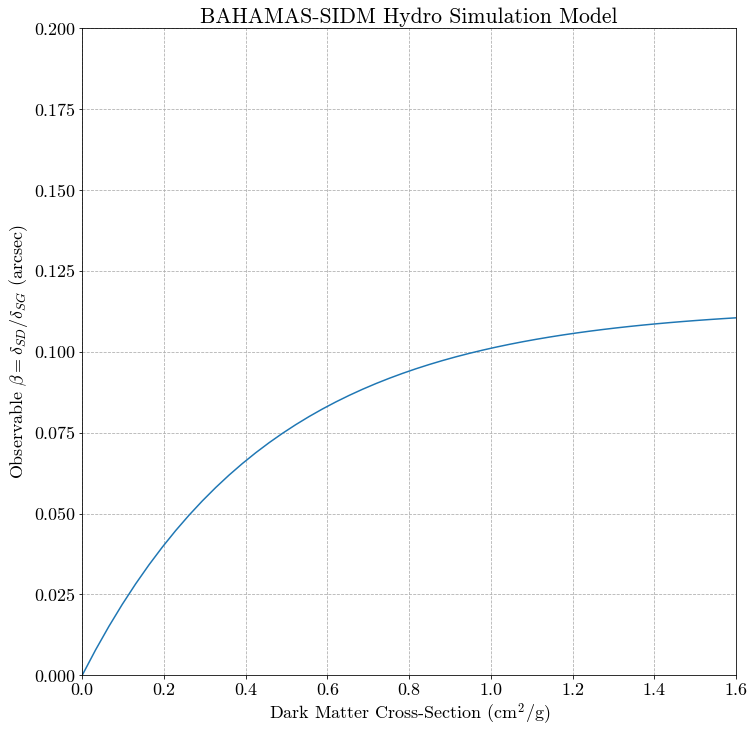

In [7]:
# Best fit beta-sidm relation from BAHAMAS
A = 0.114
sigma_star = 0.459
x = np.linspace(0, 1.6, 50)
beta_bahamas = A * (1- np.exp(-x/sigma_star))

plt.figure(figsize=(10,10))
plt.plot(x, beta_bahamas)
plt.title("BAHAMAS-SIDM Hydro Simulation Model")
plt.xlabel("Dark Matter Cross-Section (cm$^2$/g)")
plt.ylabel("Observable $ \\beta = \delta_{{SD}}/\delta_{{SG}}$ (arcsec)")
plt.tight_layout(pad=0)
plt.grid(linestyle='--')
plt.ylim(0, 0.2)
plt.xlim(0, 1.6)

The Uncertainty relation between an arbitrary $f(x)$ and $x$ is given by
$$\delta_f = \left| \frac{\partial f}{\partial x} \right| \delta_x.$$

So, using $$\beta = A (1-\text{e}^{-\sigma / \sigma^*}),$$

we can obtain 

$$\begin{align}
\delta_\beta &=  \left| \frac{\partial \beta (\sigma_{DM})}{\partial \sigma_{DM}} \right| \delta_{\sigma_{DM}} \\
&= \left| \frac{A}{\sigma^*} \text{e}^{-\sigma_{DM}/\sigma^*}\right| \delta_{\sigma_{DM}}
\end{align}.$$

We can see that 
$$ \left| \frac{A}{\sigma^*} \text{e}^{-\sigma_{DM}/\sigma^*}\right| = \left| \frac{A-\beta}{\sigma^*} \right|.$$

Since our $\beta$ is centered at 0, we set $\beta = 0$ to get:
$$ \delta_{\sigma_{DM}} = \delta_\beta \left| \frac{\sigma^*}{A} \right|.$$

In [8]:
# BAHAMAS model constraints on sigma_DM
d_dm_hst_bahamas = d_beta_hst_h14 * sigma_star / A # HST, BAHAMAS sim fit model
d_dm_sb_bahamas = d_beta_sb_h14 * sigma_star / A # SuperBIT, BAHAMAS model

print("Uncertainty in sigma_DM for HST (BAHAMAS Model) = {:.2f}".format(d_dm_hst_bahamas))
print("Uncertainty in sigma_DM for SuperBIT (BAHAMAS Model) = {:.2f}".format(d_dm_sb_bahamas))

Uncertainty in sigma_DM for HST (BAHAMAS Model) = 0.60
Uncertainty in sigma_DM for SuperBIT (BAHAMAS Model) = 0.70


## Harvey 14 Model

For Harvey 14, we assume a linear model $$\beta = C \sigma_{DM}$$ as seen in the Harvey BAHAMAS plot.
Then, the uncertainty relation is given by:
$$\delta_\beta = C \delta_{\sigma_{DM}}.$$

Thus, we can simply calculate the ratio
$$\frac{\delta_\beta}{\delta_{\sigma_{DM}}} = C$$
from the Harvey 14 results, and use it to obtain the $\beta$ model.

In [9]:
d_dm_hst_h14 = 1.075 # HST, Harvey 14 model
# d_beta_hst_h14 = 0.15 as defined earlier
h14_const = d_beta_hst_h14 / d_dm_hst_h14

d_dm_sb_h14 = d_beta_sb_h14 / h14_const

print("Uncertainty in sigma_DM for HST (H14 Model) = {:.2f}".format(d_dm_hst_h14))
print("Uncertainty in sigma_DM for SuperBIT (H14 Model) = {:.2f}".format(d_dm_sb_h14))

Uncertainty in sigma_DM for HST (H14 Model) = 1.07
Uncertainty in sigma_DM for SuperBIT (H14 Model) = 1.24


## Model Comparison

(0.0, 1.6)

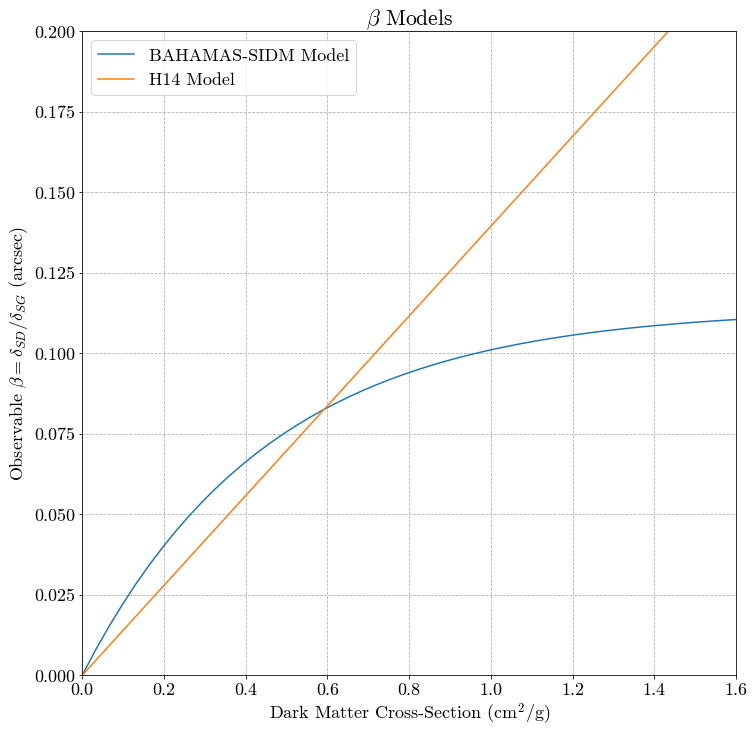

In [10]:
x = np.linspace(0, 1.6, 50)
beta_bahamas = A * (1- np.exp(-x/sigma_star))
beta_h14 = h14_const*x # linear model guess

plt.figure(figsize=(10,10))
plt.plot(x, beta_bahamas, label='BAHAMAS-SIDM Model')

plt.plot(x, beta_h14, label='H14 Model')


plt.title("$\\beta$ Models")
plt.xlabel("Dark Matter Cross-Section (cm$^2$/g)")
plt.ylabel("Observable $ \\beta = \delta_{{SD}}/\delta_{{SG}}$ (arcsec)")
plt.tight_layout(pad=0)
plt.grid(linestyle='--')
plt.legend()
plt.ylim(0, 0.2)
plt.xlim(0, 1.6)

# $\sigma_{DM}$ Uncertainty Plots (z=0.2)

In [11]:
print("BAHAMAS: HST sigma_DM = {:.3f}".format(d_dm_hst_bahamas))
print("BAHAMAS: SuperBIT sigma_DM = {:.3f}".format(d_dm_sb_bahamas))
print()
print("Harvey 2014: HST sigma_DM = {:.3f}".format(d_dm_hst_h14))
print("Harvey 2014: SuperBIT sigma_DM = {:.3f}".format(d_dm_sb_h14))

BAHAMAS: HST sigma_DM = 0.604
BAHAMAS: SuperBIT sigma_DM = 0.697

Harvey 2014: HST sigma_DM = 1.075
Harvey 2014: SuperBIT sigma_DM = 1.241


## Harvey 14 Model

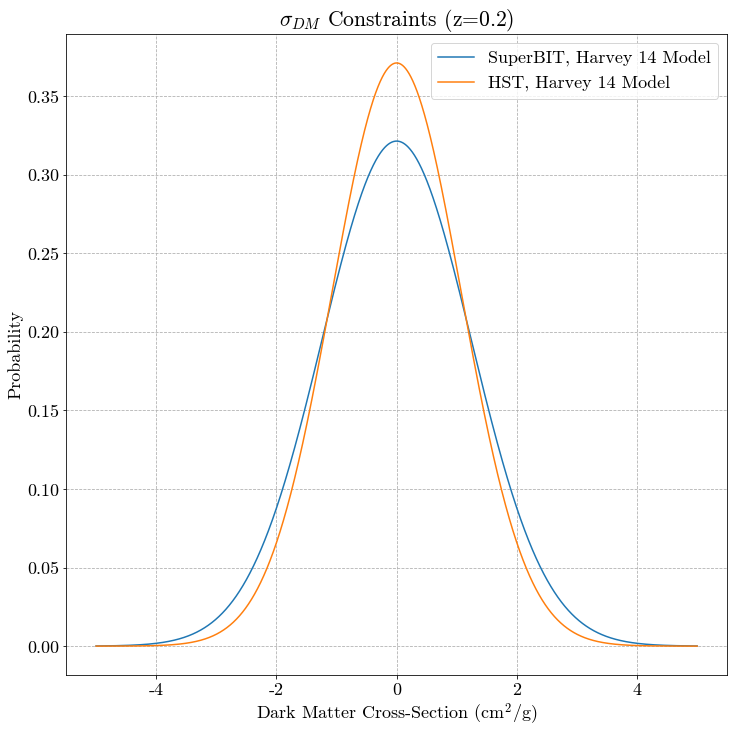

In [12]:
# Plot H14 results
plt.figure(figsize=(10,10))

x = np.arange(-5, 5, 0.001)

plt.plot(x, norm.pdf(x,0,d_dm_sb_h14), label='SuperBIT, Harvey 14 Model')
plt.plot(x, norm.pdf(x,0,d_dm_hst_h14), label='HST, Harvey 14 Model')


plt.title("$\sigma_{DM}$ Constraints (z=0.2)")
plt.xlabel("Dark Matter Cross-Section (cm$^2$/g)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout(pad=0)
plt.grid(linestyle='--')
plt.show()

## BAHAMAS Model

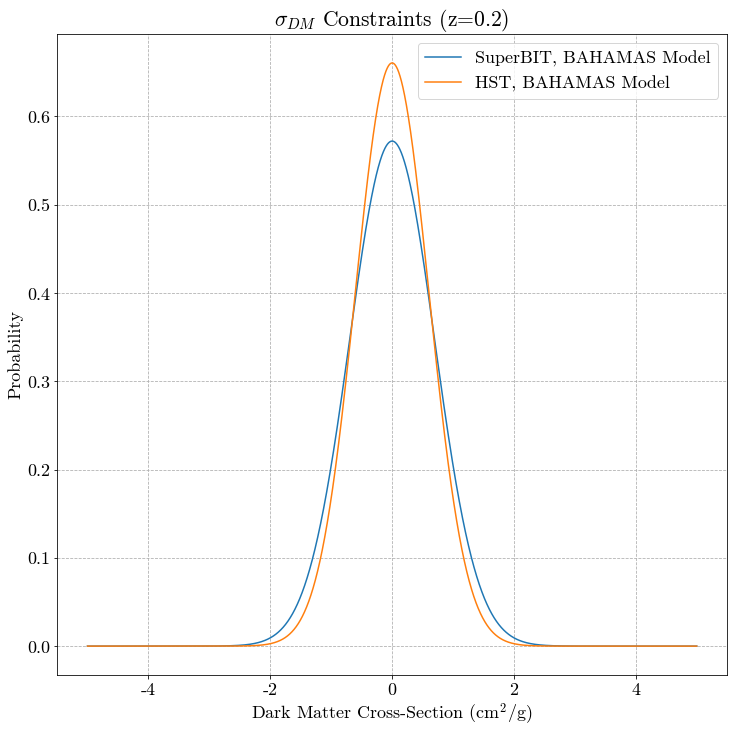

In [13]:
# Plot BAHAMAS results
plt.figure(figsize=(10,10))

x = np.arange(-5, 5, 0.001)

plt.plot(x, norm.pdf(x,0,d_dm_sb_bahamas), label='SuperBIT, BAHAMAS Model')
plt.plot(x, norm.pdf(x,0,d_dm_hst_bahamas), label='HST, BAHAMAS Model')


plt.title("$\sigma_{DM}$ Constraints (z=0.2)")
plt.xlabel("Dark Matter Cross-Section (cm$^2$/g)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout(pad=0)
plt.grid(linestyle='--')
plt.show()

## Both Models

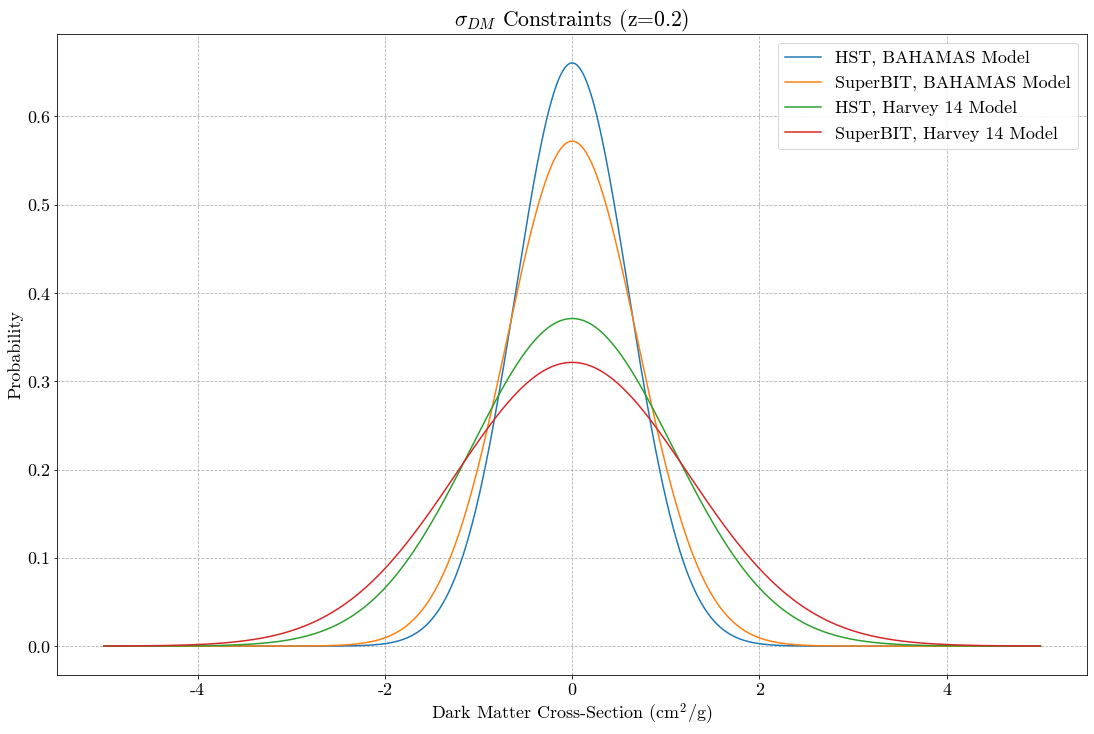

In [14]:
# Plot All results together
plt.figure(figsize=(15,10))

x = np.arange(-5, 5, 0.001)

plt.plot(x, norm.pdf(x,0,d_dm_hst_bahamas), label='HST, BAHAMAS Model')
plt.plot(x, norm.pdf(x,0,d_dm_sb_bahamas), label='SuperBIT, BAHAMAS Model')

plt.plot(x, norm.pdf(x,0,d_dm_hst_h14), label='HST, Harvey 14 Model')
plt.plot(x, norm.pdf(x,0,d_dm_sb_h14), label='SuperBIT, Harvey 14 Model')


plt.title("$\sigma_{DM}$ Constraints (z=0.2)")
plt.xlabel("Dark Matter Cross-Section (cm$^2$/g)")
plt.ylabel("Probability")
plt.legend(bbox_to_anchor=(1, 1.))
plt.tight_layout(pad=0)
plt.grid(linestyle='--')
plt.show()

# old notes

Uncertainty Propagation:

Harvey Chat:
    $\delta_{\mathbin{\|}} \sim \frac{1}{\sqrt{N}}$ 
This N seems to be the number of clusters, not background galaxies.
"In the current regime, this is limited only by $\sqrt{N}$ statistics of the number of pieces of observed substructure." (Harvey 2014, p.414)

What is the relation to $N_{\text{eff}}$?
    

We know from the N_eff plots that the effect of blending is negligible, but the effect of the band is significant. It may be reasonable to assume that the lower resolution of SuperBIT will not add to the uncertainty in $\delta$.
Instead, when the effective depth of the telescope changes based on which filter we use, we may see fewer clusters.

If I can model the distribution of clusters vs redshift, I will know how many sources in each cluster I am expected to miss vs redshift (because their mag is too low).

Then, I need to figure out how the number of sources identified in a cluster affects the cluster identification. This will give me a way to estimate how many clusters I won't see using a given filter. 

That affects N, which feeds into the uncertainty as $\sqrt{N}$.